## Assignment 7, Question 3
Wine Data for Clustering

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import (KMeans, AgglomerativeClustering)
from scipy.cluster.hierarchy import (linkage, dendrogram, cut_tree)
from sklearn.metrics import silhouette_score
from ISLP.cluster import compute_linkage
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('wine-clustering.csv')

print(df.head())
print(df.info())
print(df.describe())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [7]:
X_scaled = StandardScaler().fit_transform(df)

pca = PCA().fit(X_scaled)
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.80) + 1
print(f"Number of components to explain 80% variance: {n_components}")

Number of components to explain 80% variance: 5


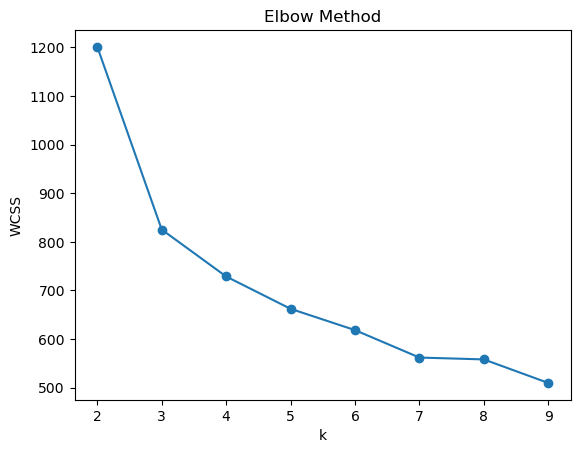

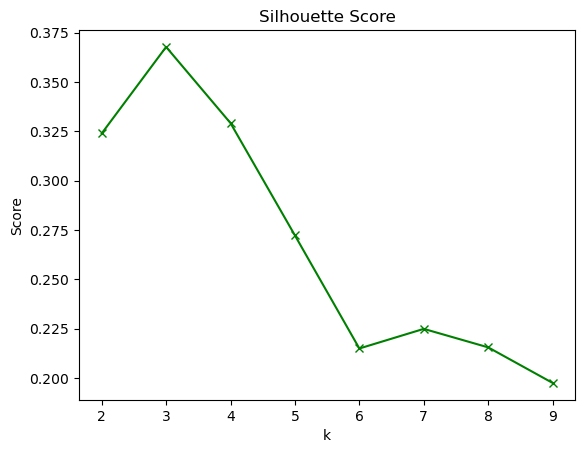

In [41]:
pca = PCA(n_components=n_components)
Xpca = pca.fit_transform(X_scaled)

wcss = []
silhouette_scores = []

k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=55)
    kmeans.fit(Xpca)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(Xpca, kmeans.labels_))

plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

plt.plot(k_values, silhouette_scores, marker='x', color='green')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.show()

Elbow plot (WCSS) shows a sharp drop from k=2 to k=3 and apparent flattening after 3. The silhouette curve also shows a global maximum at k=3, which means the points are, on average, best matched to their cluster and well separated from others when k=3.

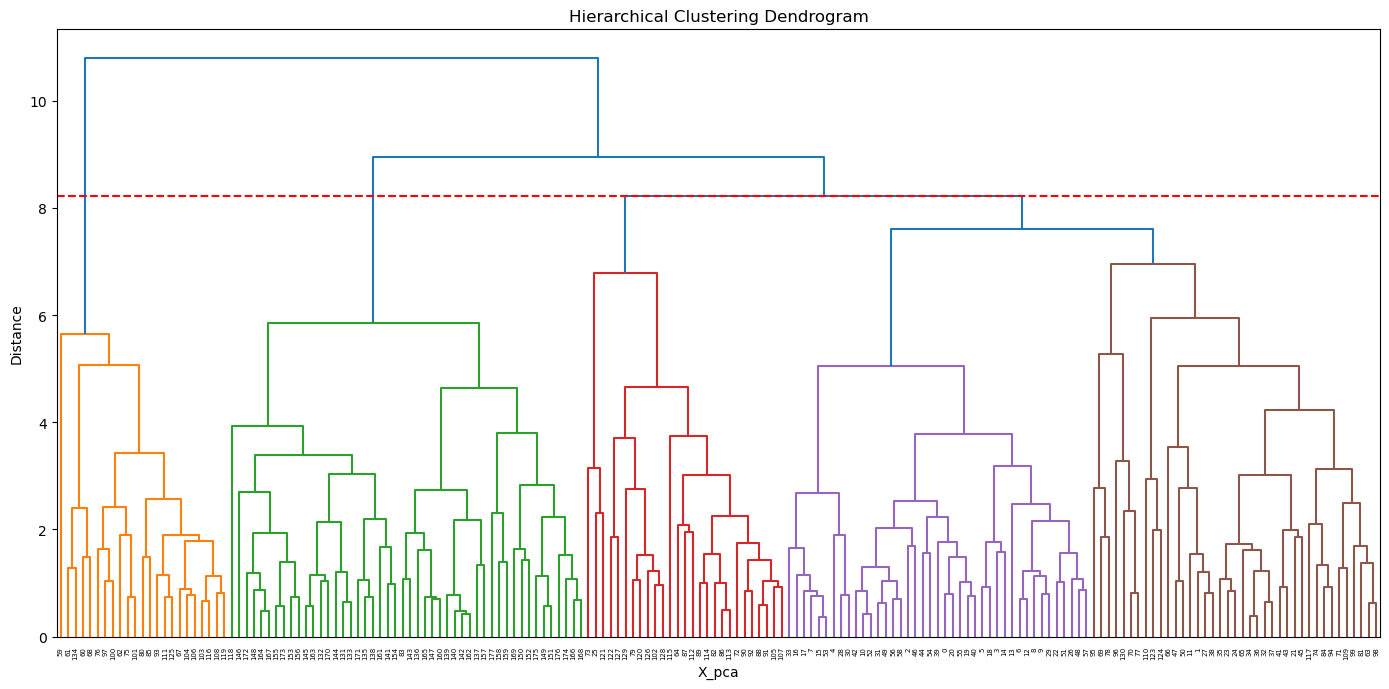

In [65]:
hc_comp = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
hc_comp.fit(Xpca)

linkage = compute_linkage(hc_comp)
plt.figure(figsize=(14, 7))
dendrogram(linkage, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("X_pca")
plt.ylabel("Distance")
plt.axhline(y=linkage[-3, 2], color='red', linestyle='--', label='Cut for 3 clusters')
plt.tight_layout()
plt.show()

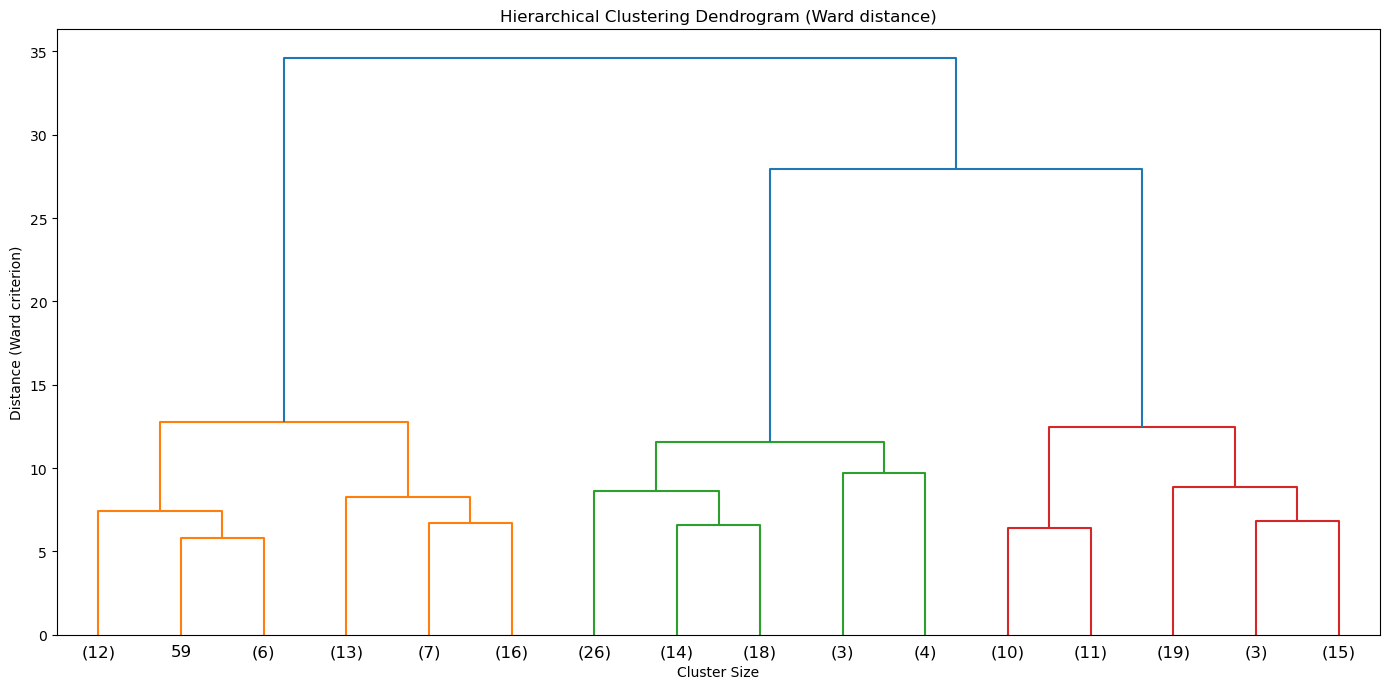

In [59]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(14, 7))
plt.title("Hierarchical Clustering Dendrogram (Ward distance)")
dend = shc.dendrogram(shc.linkage(X_pca, method='ward'), truncate_mode='lastp', p=16, show_leaf_counts=True)
plt.xlabel("Cluster Size")
plt.ylabel("Distance (Ward criterion)")
plt.tight_layout()
plt.show()

In [71]:
k_values_hc = [3, 4, 5, 6]
silhouette_scores_hc = {}

for k_val_hc in k_values_hc:
    agg_clustering = AgglomerativeClustering(n_clusters=k_val_hc, linkage='ward')
    hc_labels = agg_clustering.fit_predict(X_pca)
    silhouette_avg_hc = silhouette_score(X_pca, hc_labels)
    silhouette_scores_hc[k_val_hc] = silhouette_avg_hc
    print(f"Hierarchical Clustering with K={k_val_hc} (Ward): Silhouette Score={silhouette_avg_hc:.4f}")


Hierarchical Clustering with K=3 (Ward): Silhouette Score=0.3468
Hierarchical Clustering with K=4 (Ward): Silhouette Score=0.2913
Hierarchical Clustering with K=5 (Ward): Silhouette Score=0.2679
Hierarchical Clustering with K=6 (Ward): Silhouette Score=0.2812


To prepare the wine dataset of 178 samples and 13 chemical attributes for analysis, we first standardized it to ensure all features contributed equally, as PCA and K-Means are sensitive to feature scales. PCA was then used to reduce the data's dimensionality, condensing the 13 original features into five principal components while retaining 80% of the variance. This reduced dataset was subsequently used for clustering, employing K-Means and Agglomerative hierarchical clustering with 'complete' and 'ward' linkage methods. Like K-Means, the 'ward' linkage (known for minimizing within-cluster variance) also achieved the highest silhouette score with k=3.  
## Interpretation  
Both K-Means and Hierarchical clustering, when applied to the PCA-reduced wine data and evaluated with the elbow method and silhouette scores, strongly suggest that three clusters are a fitting choice for this dataset. This finding is particularly noteworthy because the original wine dataset is known to contain precisely three different wine cultivars, indicating that these unsupervised clustering methods effectively uncover the inherent, pre-defined structure within the data. The principal components, which are essentially combinations of the 13 original chemical properties, capture the most significant variations in the data. Therefore, the clusters formed based on these components group wines with similar chemical profiles as defined by these dominant patterns. In essence, by using these techniques, we've successfully simplified the complex wine dataset and pinpointed a probable underlying structure of three distinct groups, which remarkably aligns with the known characteristics of this specific dataset.  
## Assumptions  
PCA and K-Means clustering operate under specific assumptions and are sensitive to data scaling. PCA assumes that its principal components, which capture the most information, are linear combinations of the original features and that directions with greater variance hold more significance. Its sensitivity to data scaling was mitigated by standardizing the data beforehand. Similarly, K-Means clustering assumes that clusters are spherical and of comparable size, requiring the number of clusters to be predetermined. It is also sensitive to feature scaling and can be affected by outliers, which might disproportionately influence cluster centroids. In contrast, Hierarchical clustering offers more flexibility as it does not necessitate a pre-defined number of clusters. Instead, it builds them based on data connectivity or distance, with the dendrogram as a guide for cluster determination.